In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fit
from scipy.stats import sem

In [ ]:
dN=pd.read_csv('NOAA.csv')
display(dN)
dN=dN.dropna()

,YEAR,Tmax,Tmin,<100K
0,1960,60.25,40.00,0
1,1964,59.00,36.25,0
2,1968,60.25,40.00,0
3,1972,61.75,38.00,0
4,1976,65.00,41.00,0
5,1980,60.00,39.25,0
6,1984,64.50,39.75,0
7,1988,63.50,36.00,0
8,1992,63.75,42.25,0
9,1996,61.00,41.50,0


In [ ]:
stx=dN["Tmax"]
stn=dN["Tmin"]
sdt=dN["YEAR"]-1960
dN["Tavg"]=(dN['Tmax']+dN['Tmin'])/2
sav=(stx+stn)/2
display(sav)



,0
0,50.125
1,47.625
2,50.125
3,49.875
4,53.000
5,49.625
6,52.125
7,49.750
8,53.000
9,51.250


In [ ]:
def f(m,x,b):
  return (m*x)+b
p=[0,0]

In [ ]:
para,cv=fit.curve_fit(f,sdt,stx,p)
max=f(para[0],sdt,para[1])
pm=para[0]
bm=para[1]
print(max)
para,cv=fit.curve_fit(f,sdt,stn,p)
pn=para[0]
bn=para[1]
min=f(para[0],sdt,para[1])
print(min)
para,cv=fit.curve_fit(f,sdt,sav,p)
pa=para[0]
ba=para[1]
avg=f(para[0],sdt,para[1])
print(avg)
nam=dN.columns[3]
nam

0     60.916666
1     61.063113
2     61.209559
3     61.356005
4     61.502451
5     61.648897
6     61.795343
7     61.941789
8     62.088235
9     62.234681
10    62.381128
11    62.527574
12    62.674020
13    62.820466
14    62.966912
15    63.113358
16    63.259804
Name: YEAR, dtype: float64
0     38.931373
1     38.963848
2     38.996324
3     39.028799
4     39.061275
5     39.093750
6     39.126226
7     39.158701
8     39.191176
9     39.223652
10    39.256127
11    39.288603
12    39.321078
13    39.353554
14    39.386029
15    39.418505
16    39.450980
Name: YEAR, dtype: float64
0     49.924020
1     50.013480
2     50.102941
3     50.192402
4     50.281863
5     50.371324
6     50.460784
7     50.550245
8     50.639706
9     50.729167
10    50.818628
11    50.908088
12    50.997549
13    51.087010
14    51.176471
15    51.265932
16    51.355392
Name: YEAR, dtype: float64


'<100K'

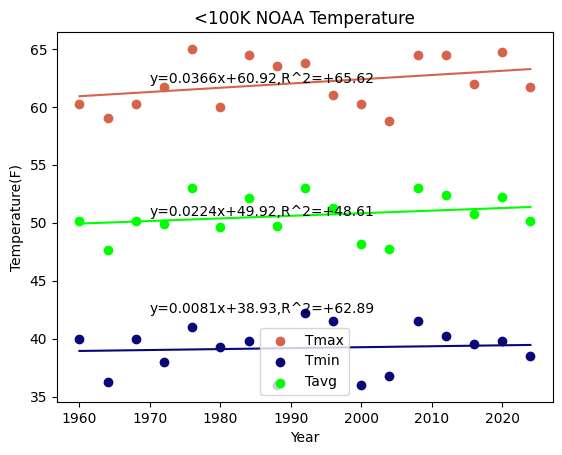

In [ ]:
date=dN["YEAR"]
TMax=stx
TMin=stn
Tavg=sav
mx=np.mean(TMax)
mn=np.mean(TMin)
ma=np.mean(Tavg)
plt.scatter(date,TMax,label="Tmax",color="#d6644b")
plt.scatter(date,TMin,label="Tmin",color="#080878")
plt.scatter(date,Tavg,label="Tavg",color="lime")
plt.plot(date,max,color="#d6644b")
plt.plot(date,min,color="#080878")
plt.plot(date,avg,color="lime")
mae=np.sum((TMax-max)**2)
mie=np.sum((TMin-min)**2)
ave=np.sum((Tavg-avg)**2)
plt.text(1970, mx, 'y='+ '{:.4f}'.format(pm) +"x"+'{:+.2f}'.format(bm) + ",R^2="+'{:+.2f}'.format(mae), size=10)
plt.text(1970, ma, 'y='+ '{:.4f}'.format(pa) +"x"+'{:+.2f}'.format(ba) + ",R^2="+'{:+.2f}'.format(ave), size=10)
plt.text(1970, mn+3, 'y='+ '{:.4f}'.format(pn) +"x"+'{:+.2f}'.format(bn) + ",R^2="+'{:+.2f}'.format(mie), size=10)
plt.title(nam + " NOAA Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature(F)")


plt.legend()


plt.show()


In [ ]:
dN['Precip']=dN['Liq Water']+dN['Snow']
fig,ax=plt.subplots(1,1,figsize=(2.5,5))

fig.suptitle(nam + " NOAA Water+Ice\n and Temperature")

#Max temp
ax[0].scatter(TMax,dN['Precip'])
para,cv=fit.curve_fit(f,TMax,dN['Precip'],p)
prec=f(para[0],TMax,para[1])
ax[0].plot(TMax,prec)
ax[0].set_ylabel("Precipitation(in)")
ax[0].set_xlabel('y='+ '{:.4f}'.format(para[0]) +'x'+'{:+.4f}'.format(para[1]) +"\n Temperature(F)(Max)")
#Average Temp
ax[1].scatter(Tavg,dN['Precip'])
para,cv=fit.curve_fit(f,Tavg,dN['Precip'],p)
prec=f(para[0],Tavg,para[1])
ax[1].plot(Tavg,prec)
ax[1].set_xlabel('y='+ '{:.4f}'.format(para[0]) +"x"+'{:+.4f}'.format(para[1]) +"\n Temperature(F)(Avg)")
#Low Temp
ax[2].scatter(TMin,dN['Precip'])
para,cv=fit.curve_fit(f,TMin,dN['Precip'],p)
prec=f(para[0],TMin,para[1])
ax[2].plot(TMin,prec)
ax[2].set_xlabel('y='+ '{:.4f}'.format(para[0]) +"x"+'{:+.4f}'.format(para[1]) +"\n Temperature(F)(Min)")
#Precip to date

ax.scatter(date,dN['Precip'])
para,cv=fit.curve_fit(f,sdt,dN['Precip'],p)
prec=f(para[0],sdt,para[1])
ax.plot(date,prec)
ax.set_xlabel('y='+ '{:.4f}'.format(para[0]) +"x"+'{:+.4f}'.format(para[1])+"\n Year")
plt.show()


KeyError: 'Liq Water'